In [1]:
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="0"

home_dir = os.environ['HOME']
sys.path.insert(0, home_dir + '/Dropbox/git/ConvVAE')
from utils.generic_utils import *
from model.configuration import Config, TrainConfig
from model.model import VAE
from model.training import VAETrainer

import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

## config

In [2]:
config = Config()
train_config = TrainConfig()

vars(config), vars(train_config)

({'beta': 1.0,
  'nb_levels': 3,
  'hidden_size': 2,
  'encoder_kernel_sizes': [2, 2, 2],
  'decoder_kernel_sizes': [2, 3, 3, 2],
  'nb_encoder_units': [32, 64, 128],
  'nb_decoder_units': [256, 128, 64, 32, 1],
  'encoder_strides': [2, 2, 2],
  'decoder_strides': [2, 2, 2, 1],
  'initializer_range': 0.01,
  'leaky_relu_alpha': 0.2,
  'dropout': 0.0,
  'layer_norm_eps': 1e-12,
  'base_dir': '/home/hadi/Documents/MNIST'},
 {'optim_choice': 'adam',
  'lr': 0.001,
  'betas': (0.9, 0.999),
  'weight_decay': 0.0,
  'warmup_steps': 1000,
  'use_cuda': True,
  'log_freq': 10,
  'chkpt_freq': 10,
  'batch_size': 1024,
  'runs_dir': '/home/hadi/Documents/MNIST/runs'})

## init vae

In [3]:
vae = VAE(config)

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|    Total    |   78340    |
|     ---     |    ---     |
|     net     |   41312    |
|    linear   |   36896    |
|  leaky_relu |     0      |
|     fc1     |     66     |
|     fc2     |     66     |
+-------------+------------+ 


+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|    Total    |   230272   |
|     ---     |    ---     |
|    linear   |    6912    |
|     net     |   223360   |
+-------------+------------+ 


+---------------+------------+
|  Module Name  | Num Params |
+---------------+------------+
|     Total     |   308612   |
|      ---      |    ---     |
|    encoder    |   78340    |
|    decoder    |   230272   |
| recon_loss_fn |     0      |
+---------------+------------+ 




In [10]:
vae

VAE(
  (encoder): ConvEncoder(
    (net): Sequential(
      (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.0, inplace=False)
      (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
      (4): LeakyReLU(negative_slope=0.2)
      (5): Dropout(p=0.0, inplace=False)
      (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
      (7): LeakyReLU(negative_slope=0.2)
      (8): Dropout(p=0.0, inplace=False)
    )
    (linear): Linear(in_features=1152, out_features=32, bias=True)
    (leaky_relu): LeakyReLU(negative_slope=0.2)
    (fc1): Linear(in_features=32, out_features=2, bias=True)
    (fc2): Linear(in_features=32, out_features=2, bias=True)
  )
  (decoder): ConvDecoder(
    (linear): Linear(in_features=2, out_features=2304, bias=True)
    (net): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2), bias=False)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Dropout(p=0.0, inpl

## init trainer

In [4]:
vae_trainer = VAETrainer(vae, train_config)


Total Parameters: 308612


In [7]:
cm = 'conv_vae,enc_ker_sz:{},dec_ker_sz:{},enc_units:{},dec_units:{}'
cm = cm.format(
    config.encoder_kernel_sizes,
    config.decoder_kernel_sizes,
    config.nb_encoder_units,
    config.nb_decoder_units,
).replace(" ", "")
cm

'conv_vae,enc_ker_sz:[2,2,2],dec_ker_sz:[2,3,3,2],enc_units:[32,64,128],dec_units:[256,128,64,32,1]'

## train

In [8]:
vae_trainer.train(300, comment=cm)

epoch 0, avg kl: 1.037e-01, avg recon: 6.348e+01, avg tot: 6.359e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.46it/s]
epoch 1, avg kl: 9.354e-01, avg recon: 4.967e+01, avg tot: 5.060e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.96it/s]
epoch 2, avg kl: 1.530e+00, avg recon: 4.689e+01, avg tot: 4.842e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.26it/s]
epoch 3, avg kl: 2.393e+00, avg recon: 4.359e+01, avg tot: 4.598e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.03it/s]
epoch 4, avg kl: 2.762e+00, avg recon: 4.170e+01, avg tot: 4.447e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.48it/s]
epoch 5, avg kl: 2.975e+00, avg recon: 4.059e+01, avg tot: 4.357e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.68it/s]
epoch 6, avg kl: 3.130e+00, avg recon: 3.980e+01, avg tot: 4.293e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.17it/s]
epoch 7, avg kl: 3.250e+00, avg recon: 3.913e+01, avg tot: 4.238e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.21it/s]
epoch 8, avg kl: 3.384e+00, avg recon: 3

====> valid loss.  kl: 3.532e+00, 	reconstruction: 3.788e+01, 	tot: 4.141e+01
Saving chkpt:10


epoch 10, avg kl: 3.604e+00, avg recon: 3.746e+01, avg tot: 4.107e+01, : 100%|██████████| 59/59 [00:03<00:00, 16.14it/s]
epoch 11, avg kl: 3.704e+00, avg recon: 3.696e+01, avg tot: 4.066e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.59it/s]
epoch 12, avg kl: 3.758e+00, avg recon: 3.689e+01, avg tot: 4.065e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.85it/s]
epoch 13, avg kl: 3.849e+00, avg recon: 3.625e+01, avg tot: 4.010e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.90it/s]
epoch 14, avg kl: 3.938e+00, avg recon: 3.590e+01, avg tot: 3.983e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.05it/s]
epoch 15, avg kl: 4.002e+00, avg recon: 3.566e+01, avg tot: 3.967e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.30it/s]
epoch 16, avg kl: 4.042e+00, avg recon: 3.540e+01, avg tot: 3.945e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.28it/s]
epoch 17, avg kl: 4.085e+00, avg recon: 3.520e+01, avg tot: 3.929e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.56it/s]
epoch 18, avg kl: 4.132e+00, avg

====> valid loss.  kl: 4.206e+00, 	reconstruction: 3.482e+01, 	tot: 3.902e+01
Saving chkpt:20


epoch 20, avg kl: 4.197e+00, avg recon: 3.464e+01, avg tot: 3.884e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.63it/s]
epoch 21, avg kl: 4.227e+00, avg recon: 3.447e+01, avg tot: 3.870e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.06it/s]
epoch 22, avg kl: 4.246e+00, avg recon: 3.446e+01, avg tot: 3.871e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.87it/s]
epoch 23, avg kl: 4.280e+00, avg recon: 3.423e+01, avg tot: 3.851e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.95it/s]
epoch 24, avg kl: 4.298e+00, avg recon: 3.430e+01, avg tot: 3.859e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.31it/s]
epoch 25, avg kl: 4.301e+00, avg recon: 3.408e+01, avg tot: 3.838e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.13it/s]
epoch 26, avg kl: 4.341e+00, avg recon: 3.390e+01, avg tot: 3.824e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.52it/s]
epoch 27, avg kl: 4.359e+00, avg recon: 3.380e+01, avg tot: 3.816e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.81it/s]
epoch 28, avg kl: 4.357e+00, avg

====> valid loss.  kl: 4.421e+00, 	reconstruction: 3.396e+01, 	tot: 3.838e+01
Saving chkpt:30


epoch 30, avg kl: 4.403e+00, avg recon: 3.354e+01, avg tot: 3.794e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.96it/s]
epoch 31, avg kl: 4.425e+00, avg recon: 3.350e+01, avg tot: 3.793e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.53it/s]
epoch 32, avg kl: 4.444e+00, avg recon: 3.344e+01, avg tot: 3.788e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.22it/s]
epoch 33, avg kl: 4.457e+00, avg recon: 3.330e+01, avg tot: 3.775e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.30it/s]
epoch 34, avg kl: 4.463e+00, avg recon: 3.336e+01, avg tot: 3.782e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.42it/s]
epoch 35, avg kl: 4.462e+00, avg recon: 3.338e+01, avg tot: 3.784e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.47it/s]
epoch 36, avg kl: 4.484e+00, avg recon: 3.316e+01, avg tot: 3.765e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.06it/s]
epoch 37, avg kl: 4.496e+00, avg recon: 3.316e+01, avg tot: 3.765e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.24it/s]
epoch 38, avg kl: 4.511e+00, avg

====> valid loss.  kl: 4.586e+00, 	reconstruction: 3.317e+01, 	tot: 3.775e+01
Saving chkpt:40


epoch 40, avg kl: 4.508e+00, avg recon: 3.311e+01, avg tot: 3.762e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.10it/s]
epoch 41, avg kl: 4.521e+00, avg recon: 3.294e+01, avg tot: 3.746e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.96it/s]
epoch 42, avg kl: 4.526e+00, avg recon: 3.300e+01, avg tot: 3.753e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.50it/s]
epoch 43, avg kl: 4.530e+00, avg recon: 3.291e+01, avg tot: 3.744e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.17it/s]
epoch 44, avg kl: 4.561e+00, avg recon: 3.282e+01, avg tot: 3.738e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.29it/s]
epoch 45, avg kl: 4.555e+00, avg recon: 3.297e+01, avg tot: 3.752e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.53it/s]
epoch 46, avg kl: 4.556e+00, avg recon: 3.282e+01, avg tot: 3.738e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.22it/s]
epoch 47, avg kl: 4.589e+00, avg recon: 3.274e+01, avg tot: 3.733e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.13it/s]
epoch 48, avg kl: 4.581e+00, avg

====> valid loss.  kl: 4.568e+00, 	reconstruction: 3.304e+01, 	tot: 3.761e+01
Saving chkpt:50


epoch 50, avg kl: 4.578e+00, avg recon: 3.273e+01, avg tot: 3.730e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.55it/s]
epoch 51, avg kl: 4.610e+00, avg recon: 3.263e+01, avg tot: 3.724e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.66it/s]
epoch 52, avg kl: 4.614e+00, avg recon: 3.254e+01, avg tot: 3.716e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.17it/s]
epoch 53, avg kl: 4.612e+00, avg recon: 3.259e+01, avg tot: 3.721e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.85it/s]
epoch 54, avg kl: 4.626e+00, avg recon: 3.248e+01, avg tot: 3.710e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.79it/s]
epoch 55, avg kl: 4.606e+00, avg recon: 3.266e+01, avg tot: 3.726e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.26it/s]
epoch 56, avg kl: 4.636e+00, avg recon: 3.245e+01, avg tot: 3.708e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.55it/s]
epoch 57, avg kl: 4.653e+00, avg recon: 3.239e+01, avg tot: 3.705e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.94it/s]
epoch 58, avg kl: 4.648e+00, avg

====> valid loss.  kl: 4.759e+00, 	reconstruction: 3.258e+01, 	tot: 3.734e+01
Saving chkpt:60


epoch 60, avg kl: 4.650e+00, avg recon: 3.231e+01, avg tot: 3.696e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.57it/s]
epoch 61, avg kl: 4.671e+00, avg recon: 3.232e+01, avg tot: 3.699e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.00it/s]
epoch 62, avg kl: 4.653e+00, avg recon: 3.234e+01, avg tot: 3.699e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.57it/s]
epoch 63, avg kl: 4.673e+00, avg recon: 3.222e+01, avg tot: 3.689e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.20it/s]
epoch 64, avg kl: 4.685e+00, avg recon: 3.224e+01, avg tot: 3.692e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.71it/s]
epoch 65, avg kl: 4.670e+00, avg recon: 3.232e+01, avg tot: 3.699e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.45it/s]
epoch 66, avg kl: 4.686e+00, avg recon: 3.213e+01, avg tot: 3.681e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.19it/s]
epoch 67, avg kl: 4.697e+00, avg recon: 3.220e+01, avg tot: 3.690e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.90it/s]
epoch 68, avg kl: 4.694e+00, avg

====> valid loss.  kl: 4.693e+00, 	reconstruction: 3.261e+01, 	tot: 3.730e+01
Saving chkpt:70


epoch 70, avg kl: 4.712e+00, avg recon: 3.210e+01, avg tot: 3.681e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.05it/s]
epoch 71, avg kl: 4.709e+00, avg recon: 3.216e+01, avg tot: 3.686e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.49it/s]
epoch 72, avg kl: 4.718e+00, avg recon: 3.215e+01, avg tot: 3.686e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.73it/s]
epoch 73, avg kl: 4.697e+00, avg recon: 3.219e+01, avg tot: 3.688e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.30it/s]
epoch 74, avg kl: 4.723e+00, avg recon: 3.205e+01, avg tot: 3.678e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.70it/s]
epoch 75, avg kl: 4.728e+00, avg recon: 3.198e+01, avg tot: 3.671e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.31it/s]
epoch 76, avg kl: 4.734e+00, avg recon: 3.198e+01, avg tot: 3.671e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.05it/s]
epoch 77, avg kl: 4.718e+00, avg recon: 3.208e+01, avg tot: 3.680e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.16it/s]
epoch 78, avg kl: 4.738e+00, avg

====> valid loss.  kl: 4.784e+00, 	reconstruction: 3.229e+01, 	tot: 3.707e+01
Saving chkpt:80


epoch 80, avg kl: 4.744e+00, avg recon: 3.191e+01, avg tot: 3.665e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.05it/s]
epoch 81, avg kl: 4.744e+00, avg recon: 3.188e+01, avg tot: 3.662e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.41it/s]
epoch 82, avg kl: 4.744e+00, avg recon: 3.198e+01, avg tot: 3.672e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.95it/s]
epoch 83, avg kl: 4.755e+00, avg recon: 3.185e+01, avg tot: 3.661e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.03it/s]
epoch 84, avg kl: 4.768e+00, avg recon: 3.178e+01, avg tot: 3.655e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.82it/s]
epoch 85, avg kl: 4.772e+00, avg recon: 3.184e+01, avg tot: 3.661e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.19it/s]
epoch 86, avg kl: 4.760e+00, avg recon: 3.178e+01, avg tot: 3.654e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.03it/s]
epoch 87, avg kl: 4.774e+00, avg recon: 3.181e+01, avg tot: 3.659e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.75it/s]
epoch 88, avg kl: 4.774e+00, avg

====> valid loss.  kl: 4.696e+00, 	reconstruction: 3.230e+01, 	tot: 3.700e+01
Saving chkpt:90


epoch 90, avg kl: 4.768e+00, avg recon: 3.175e+01, avg tot: 3.652e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.79it/s]
epoch 91, avg kl: 4.776e+00, avg recon: 3.177e+01, avg tot: 3.655e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.51it/s]
epoch 92, avg kl: 4.781e+00, avg recon: 3.167e+01, avg tot: 3.645e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.31it/s]
epoch 93, avg kl: 4.787e+00, avg recon: 3.172e+01, avg tot: 3.650e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.08it/s]
epoch 94, avg kl: 4.792e+00, avg recon: 3.176e+01, avg tot: 3.656e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.61it/s]
epoch 95, avg kl: 4.794e+00, avg recon: 3.165e+01, avg tot: 3.644e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.64it/s]
epoch 96, avg kl: 4.788e+00, avg recon: 3.166e+01, avg tot: 3.645e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.73it/s]
epoch 97, avg kl: 4.796e+00, avg recon: 3.166e+01, avg tot: 3.646e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.35it/s]
epoch 98, avg kl: 4.796e+00, avg

====> valid loss.  kl: 4.880e+00, 	reconstruction: 3.191e+01, 	tot: 3.679e+01
Saving chkpt:100


epoch 100, avg kl: 4.810e+00, avg recon: 3.154e+01, avg tot: 3.635e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.78it/s]
epoch 101, avg kl: 4.833e+00, avg recon: 3.155e+01, avg tot: 3.638e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.59it/s]
epoch 102, avg kl: 4.806e+00, avg recon: 3.158e+01, avg tot: 3.639e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.70it/s]
epoch 103, avg kl: 4.827e+00, avg recon: 3.156e+01, avg tot: 3.638e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.30it/s]
epoch 104, avg kl: 4.814e+00, avg recon: 3.153e+01, avg tot: 3.634e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.38it/s]
epoch 105, avg kl: 4.835e+00, avg recon: 3.152e+01, avg tot: 3.636e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.39it/s]
epoch 106, avg kl: 4.833e+00, avg recon: 3.144e+01, avg tot: 3.628e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.55it/s]
epoch 107, avg kl: 4.835e+00, avg recon: 3.144e+01, avg tot: 3.628e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.26it/s]
epoch 108, avg kl: 4.838

====> valid loss.  kl: 4.894e+00, 	reconstruction: 3.206e+01, 	tot: 3.696e+01
Saving chkpt:110


epoch 110, avg kl: 4.848e+00, avg recon: 3.139e+01, avg tot: 3.624e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.92it/s]
epoch 111, avg kl: 4.840e+00, avg recon: 3.144e+01, avg tot: 3.628e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.04it/s]
epoch 112, avg kl: 4.847e+00, avg recon: 3.146e+01, avg tot: 3.631e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.80it/s]
epoch 113, avg kl: 4.864e+00, avg recon: 3.130e+01, avg tot: 3.617e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.81it/s]
epoch 114, avg kl: 4.845e+00, avg recon: 3.136e+01, avg tot: 3.621e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.40it/s]
epoch 115, avg kl: 4.861e+00, avg recon: 3.134e+01, avg tot: 3.620e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.63it/s]
epoch 116, avg kl: 4.872e+00, avg recon: 3.125e+01, avg tot: 3.612e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.43it/s]
epoch 117, avg kl: 4.867e+00, avg recon: 3.135e+01, avg tot: 3.622e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.72it/s]
epoch 118, avg kl: 4.882

====> valid loss.  kl: 4.889e+00, 	reconstruction: 3.189e+01, 	tot: 3.678e+01
Saving chkpt:120


epoch 120, avg kl: 4.872e+00, avg recon: 3.130e+01, avg tot: 3.617e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.60it/s]
epoch 121, avg kl: 4.872e+00, avg recon: 3.123e+01, avg tot: 3.610e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.08it/s]
epoch 122, avg kl: 4.873e+00, avg recon: 3.133e+01, avg tot: 3.620e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.88it/s]
epoch 123, avg kl: 4.888e+00, avg recon: 3.120e+01, avg tot: 3.609e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.72it/s]
epoch 124, avg kl: 4.888e+00, avg recon: 3.117e+01, avg tot: 3.606e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.14it/s]
epoch 125, avg kl: 4.886e+00, avg recon: 3.124e+01, avg tot: 3.612e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.55it/s]
epoch 126, avg kl: 4.896e+00, avg recon: 3.122e+01, avg tot: 3.611e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.79it/s]
epoch 127, avg kl: 4.897e+00, avg recon: 3.115e+01, avg tot: 3.605e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.81it/s]
epoch 128, avg kl: 4.887

====> valid loss.  kl: 4.957e+00, 	reconstruction: 3.165e+01, 	tot: 3.661e+01
Saving chkpt:130


epoch 130, avg kl: 4.915e+00, avg recon: 3.108e+01, avg tot: 3.600e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.95it/s]
epoch 131, avg kl: 4.906e+00, avg recon: 3.123e+01, avg tot: 3.613e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.74it/s]
epoch 132, avg kl: 4.903e+00, avg recon: 3.111e+01, avg tot: 3.601e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.05it/s]
epoch 133, avg kl: 4.919e+00, avg recon: 3.102e+01, avg tot: 3.594e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.65it/s]
epoch 134, avg kl: 4.915e+00, avg recon: 3.105e+01, avg tot: 3.597e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.03it/s]
epoch 135, avg kl: 4.911e+00, avg recon: 3.107e+01, avg tot: 3.598e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.87it/s]
epoch 136, avg kl: 4.921e+00, avg recon: 3.105e+01, avg tot: 3.598e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.17it/s]
epoch 137, avg kl: 4.931e+00, avg recon: 3.103e+01, avg tot: 3.596e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.74it/s]
epoch 138, avg kl: 4.930

====> valid loss.  kl: 4.900e+00, 	reconstruction: 3.154e+01, 	tot: 3.644e+01
Saving chkpt:140


epoch 140, avg kl: 4.945e+00, avg recon: 3.092e+01, avg tot: 3.586e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.12it/s]
epoch 141, avg kl: 4.933e+00, avg recon: 3.102e+01, avg tot: 3.595e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.55it/s]
epoch 142, avg kl: 4.944e+00, avg recon: 3.095e+01, avg tot: 3.590e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.07it/s]
epoch 143, avg kl: 4.948e+00, avg recon: 3.089e+01, avg tot: 3.584e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.05it/s]
epoch 144, avg kl: 4.951e+00, avg recon: 3.093e+01, avg tot: 3.588e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.08it/s]
epoch 145, avg kl: 4.959e+00, avg recon: 3.090e+01, avg tot: 3.586e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.42it/s]
epoch 146, avg kl: 4.950e+00, avg recon: 3.089e+01, avg tot: 3.584e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.66it/s]
epoch 147, avg kl: 4.944e+00, avg recon: 3.082e+01, avg tot: 3.577e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.88it/s]
epoch 148, avg kl: 4.951

====> valid loss.  kl: 5.018e+00, 	reconstruction: 3.126e+01, 	tot: 3.628e+01
Saving chkpt:150


epoch 150, avg kl: 4.952e+00, avg recon: 3.089e+01, avg tot: 3.584e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.25it/s]
epoch 151, avg kl: 4.968e+00, avg recon: 3.086e+01, avg tot: 3.582e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.86it/s]
epoch 152, avg kl: 4.971e+00, avg recon: 3.078e+01, avg tot: 3.575e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.42it/s]
epoch 153, avg kl: 4.976e+00, avg recon: 3.082e+01, avg tot: 3.579e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.99it/s]
epoch 154, avg kl: 4.978e+00, avg recon: 3.081e+01, avg tot: 3.578e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.59it/s]
epoch 155, avg kl: 4.955e+00, avg recon: 3.087e+01, avg tot: 3.582e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.50it/s]
epoch 156, avg kl: 4.967e+00, avg recon: 3.081e+01, avg tot: 3.578e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.14it/s]
epoch 157, avg kl: 4.945e+00, avg recon: 3.098e+01, avg tot: 3.592e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.06it/s]
epoch 158, avg kl: 4.980

====> valid loss.  kl: 4.950e+00, 	reconstruction: 3.143e+01, 	tot: 3.638e+01
Saving chkpt:160


epoch 160, avg kl: 4.976e+00, avg recon: 3.071e+01, avg tot: 3.569e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.68it/s]
epoch 161, avg kl: 4.985e+00, avg recon: 3.066e+01, avg tot: 3.565e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.11it/s]
epoch 162, avg kl: 4.990e+00, avg recon: 3.066e+01, avg tot: 3.565e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.61it/s]
epoch 163, avg kl: 4.991e+00, avg recon: 3.068e+01, avg tot: 3.568e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.21it/s]
epoch 164, avg kl: 4.998e+00, avg recon: 3.075e+01, avg tot: 3.575e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.22it/s]
epoch 165, avg kl: 5.004e+00, avg recon: 3.066e+01, avg tot: 3.567e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.32it/s]
epoch 166, avg kl: 5.001e+00, avg recon: 3.075e+01, avg tot: 3.575e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.50it/s]
epoch 167, avg kl: 5.001e+00, avg recon: 3.060e+01, avg tot: 3.561e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.64it/s]
epoch 168, avg kl: 5.013

====> valid loss.  kl: 4.965e+00, 	reconstruction: 3.135e+01, 	tot: 3.631e+01
Saving chkpt:170


epoch 170, avg kl: 5.022e+00, avg recon: 3.058e+01, avg tot: 3.560e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.36it/s]
epoch 171, avg kl: 5.019e+00, avg recon: 3.056e+01, avg tot: 3.558e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.74it/s]
epoch 172, avg kl: 5.008e+00, avg recon: 3.058e+01, avg tot: 3.558e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.44it/s]
epoch 173, avg kl: 4.999e+00, avg recon: 3.073e+01, avg tot: 3.573e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.07it/s]
epoch 174, avg kl: 5.013e+00, avg recon: 3.054e+01, avg tot: 3.555e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.00it/s]
epoch 175, avg kl: 5.019e+00, avg recon: 3.055e+01, avg tot: 3.557e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.66it/s]
epoch 176, avg kl: 5.019e+00, avg recon: 3.056e+01, avg tot: 3.558e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.37it/s]
epoch 177, avg kl: 5.029e+00, avg recon: 3.054e+01, avg tot: 3.557e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.45it/s]
epoch 178, avg kl: 5.028

====> valid loss.  kl: 5.029e+00, 	reconstruction: 3.115e+01, 	tot: 3.618e+01
Saving chkpt:180


epoch 180, avg kl: 5.036e+00, avg recon: 3.049e+01, avg tot: 3.553e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.85it/s]
epoch 181, avg kl: 5.034e+00, avg recon: 3.051e+01, avg tot: 3.554e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.64it/s]
epoch 182, avg kl: 5.046e+00, avg recon: 3.046e+01, avg tot: 3.551e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.31it/s]
epoch 183, avg kl: 5.047e+00, avg recon: 3.045e+01, avg tot: 3.550e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.65it/s]
epoch 184, avg kl: 5.023e+00, avg recon: 3.058e+01, avg tot: 3.560e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.24it/s]
epoch 185, avg kl: 5.037e+00, avg recon: 3.047e+01, avg tot: 3.551e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.97it/s]
epoch 186, avg kl: 5.060e+00, avg recon: 3.038e+01, avg tot: 3.544e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.03it/s]
epoch 187, avg kl: 5.055e+00, avg recon: 3.044e+01, avg tot: 3.549e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.43it/s]
epoch 188, avg kl: 5.050

====> valid loss.  kl: 5.079e+00, 	reconstruction: 3.110e+01, 	tot: 3.617e+01
Saving chkpt:190


epoch 190, avg kl: 5.046e+00, avg recon: 3.053e+01, avg tot: 3.557e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.86it/s]
epoch 191, avg kl: 5.048e+00, avg recon: 3.046e+01, avg tot: 3.551e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.31it/s]
epoch 192, avg kl: 5.049e+00, avg recon: 3.038e+01, avg tot: 3.543e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.96it/s]
epoch 193, avg kl: 5.053e+00, avg recon: 3.037e+01, avg tot: 3.542e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.09it/s]
epoch 194, avg kl: 5.061e+00, avg recon: 3.039e+01, avg tot: 3.545e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.39it/s]
epoch 195, avg kl: 5.069e+00, avg recon: 3.035e+01, avg tot: 3.542e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.57it/s]
epoch 196, avg kl: 5.051e+00, avg recon: 3.033e+01, avg tot: 3.538e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.45it/s]
epoch 197, avg kl: 5.081e+00, avg recon: 3.037e+01, avg tot: 3.546e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.31it/s]
epoch 198, avg kl: 5.077

====> valid loss.  kl: 5.045e+00, 	reconstruction: 3.109e+01, 	tot: 3.614e+01
Saving chkpt:200


epoch 200, avg kl: 5.077e+00, avg recon: 3.028e+01, avg tot: 3.536e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.62it/s]
epoch 201, avg kl: 5.075e+00, avg recon: 3.026e+01, avg tot: 3.533e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.66it/s]
epoch 202, avg kl: 5.089e+00, avg recon: 3.030e+01, avg tot: 3.539e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.92it/s]
epoch 203, avg kl: 5.082e+00, avg recon: 3.026e+01, avg tot: 3.534e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.76it/s]
epoch 204, avg kl: 5.091e+00, avg recon: 3.029e+01, avg tot: 3.539e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.11it/s]
epoch 205, avg kl: 5.066e+00, avg recon: 3.026e+01, avg tot: 3.532e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.70it/s]
epoch 206, avg kl: 5.089e+00, avg recon: 3.026e+01, avg tot: 3.535e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.94it/s]
epoch 207, avg kl: 5.089e+00, avg recon: 3.029e+01, avg tot: 3.538e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.04it/s]
epoch 208, avg kl: 5.084

====> valid loss.  kl: 5.225e+00, 	reconstruction: 3.076e+01, 	tot: 3.598e+01
Saving chkpt:210


epoch 210, avg kl: 5.068e+00, avg recon: 3.034e+01, avg tot: 3.541e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.18it/s]
epoch 211, avg kl: 5.095e+00, avg recon: 3.020e+01, avg tot: 3.530e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.01it/s]
epoch 212, avg kl: 5.096e+00, avg recon: 3.019e+01, avg tot: 3.529e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.08it/s]
epoch 213, avg kl: 5.109e+00, avg recon: 3.014e+01, avg tot: 3.525e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.41it/s]
epoch 214, avg kl: 5.095e+00, avg recon: 3.021e+01, avg tot: 3.531e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.52it/s]
epoch 215, avg kl: 5.095e+00, avg recon: 3.020e+01, avg tot: 3.529e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.95it/s]
epoch 216, avg kl: 5.119e+00, avg recon: 3.009e+01, avg tot: 3.520e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.18it/s]
epoch 217, avg kl: 5.110e+00, avg recon: 3.013e+01, avg tot: 3.524e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.26it/s]
epoch 218, avg kl: 5.112

====> valid loss.  kl: 5.146e+00, 	reconstruction: 3.116e+01, 	tot: 3.630e+01
Saving chkpt:220


epoch 220, avg kl: 5.102e+00, avg recon: 3.019e+01, avg tot: 3.529e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.22it/s]
epoch 221, avg kl: 5.120e+00, avg recon: 3.014e+01, avg tot: 3.526e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.05it/s]
epoch 222, avg kl: 5.118e+00, avg recon: 3.011e+01, avg tot: 3.523e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.64it/s]
epoch 223, avg kl: 5.119e+00, avg recon: 3.008e+01, avg tot: 3.520e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.40it/s]
epoch 224, avg kl: 5.122e+00, avg recon: 3.009e+01, avg tot: 3.522e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.96it/s]
epoch 225, avg kl: 5.127e+00, avg recon: 3.004e+01, avg tot: 3.517e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.63it/s]
epoch 226, avg kl: 5.122e+00, avg recon: 3.015e+01, avg tot: 3.527e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.80it/s]
epoch 227, avg kl: 5.132e+00, avg recon: 3.001e+01, avg tot: 3.514e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.08it/s]
epoch 228, avg kl: 5.139

====> valid loss.  kl: 5.170e+00, 	reconstruction: 3.085e+01, 	tot: 3.602e+01
Saving chkpt:230


epoch 230, avg kl: 5.115e+00, avg recon: 3.016e+01, avg tot: 3.528e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.85it/s]
epoch 231, avg kl: 5.126e+00, avg recon: 3.004e+01, avg tot: 3.517e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.18it/s]
epoch 232, avg kl: 5.127e+00, avg recon: 3.007e+01, avg tot: 3.520e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.25it/s]
epoch 233, avg kl: 5.145e+00, avg recon: 3.001e+01, avg tot: 3.515e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.80it/s]
epoch 234, avg kl: 5.130e+00, avg recon: 3.004e+01, avg tot: 3.517e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.04it/s]
epoch 235, avg kl: 5.147e+00, avg recon: 2.996e+01, avg tot: 3.511e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.62it/s]
epoch 236, avg kl: 5.143e+00, avg recon: 2.994e+01, avg tot: 3.508e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.39it/s]
epoch 237, avg kl: 5.131e+00, avg recon: 3.002e+01, avg tot: 3.515e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.56it/s]
epoch 238, avg kl: 5.147

====> valid loss.  kl: 5.219e+00, 	reconstruction: 3.079e+01, 	tot: 3.601e+01
Saving chkpt:240


epoch 240, avg kl: 5.150e+00, avg recon: 2.993e+01, avg tot: 3.508e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.24it/s]
epoch 241, avg kl: 5.136e+00, avg recon: 2.997e+01, avg tot: 3.511e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.62it/s]
epoch 242, avg kl: 5.159e+00, avg recon: 2.997e+01, avg tot: 3.513e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.61it/s]
epoch 243, avg kl: 5.149e+00, avg recon: 2.998e+01, avg tot: 3.513e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.71it/s]
epoch 244, avg kl: 5.160e+00, avg recon: 2.986e+01, avg tot: 3.502e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.07it/s]
epoch 245, avg kl: 5.150e+00, avg recon: 2.999e+01, avg tot: 3.514e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.57it/s]
epoch 246, avg kl: 5.167e+00, avg recon: 2.989e+01, avg tot: 3.506e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.78it/s]
epoch 247, avg kl: 5.158e+00, avg recon: 2.991e+01, avg tot: 3.506e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.85it/s]
epoch 248, avg kl: 5.152

====> valid loss.  kl: 5.233e+00, 	reconstruction: 3.088e+01, 	tot: 3.611e+01
Saving chkpt:250


epoch 250, avg kl: 5.169e+00, avg recon: 2.982e+01, avg tot: 3.499e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.44it/s]
epoch 251, avg kl: 5.158e+00, avg recon: 2.980e+01, avg tot: 3.496e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.51it/s]
epoch 252, avg kl: 5.168e+00, avg recon: 2.986e+01, avg tot: 3.503e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.72it/s]
epoch 253, avg kl: 5.182e+00, avg recon: 2.991e+01, avg tot: 3.509e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.84it/s]
epoch 254, avg kl: 5.158e+00, avg recon: 2.987e+01, avg tot: 3.503e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.49it/s]
epoch 255, avg kl: 5.178e+00, avg recon: 2.980e+01, avg tot: 3.498e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.68it/s]
epoch 256, avg kl: 5.158e+00, avg recon: 2.988e+01, avg tot: 3.504e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.77it/s]
epoch 257, avg kl: 5.171e+00, avg recon: 2.983e+01, avg tot: 3.500e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.09it/s]
epoch 258, avg kl: 5.161

====> valid loss.  kl: 5.278e+00, 	reconstruction: 3.059e+01, 	tot: 3.586e+01
Saving chkpt:260


epoch 260, avg kl: 5.196e+00, avg recon: 2.981e+01, avg tot: 3.501e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.72it/s]
epoch 261, avg kl: 5.179e+00, avg recon: 2.983e+01, avg tot: 3.501e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.71it/s]
epoch 262, avg kl: 5.178e+00, avg recon: 2.976e+01, avg tot: 3.494e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.20it/s]
epoch 263, avg kl: 5.183e+00, avg recon: 2.981e+01, avg tot: 3.499e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.64it/s]
epoch 264, avg kl: 5.191e+00, avg recon: 2.978e+01, avg tot: 3.497e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.23it/s]
epoch 265, avg kl: 5.176e+00, avg recon: 2.993e+01, avg tot: 3.511e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.18it/s]
epoch 266, avg kl: 5.168e+00, avg recon: 2.979e+01, avg tot: 3.496e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.03it/s]
epoch 267, avg kl: 5.187e+00, avg recon: 2.984e+01, avg tot: 3.502e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.42it/s]
epoch 268, avg kl: 5.187

====> valid loss.  kl: 5.132e+00, 	reconstruction: 3.070e+01, 	tot: 3.584e+01
Saving chkpt:270


epoch 270, avg kl: 5.182e+00, avg recon: 2.981e+01, avg tot: 3.499e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.09it/s]
epoch 271, avg kl: 5.189e+00, avg recon: 2.974e+01, avg tot: 3.493e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.46it/s]
epoch 272, avg kl: 5.187e+00, avg recon: 2.974e+01, avg tot: 3.493e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.78it/s]
epoch 273, avg kl: 5.205e+00, avg recon: 2.969e+01, avg tot: 3.489e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.48it/s]
epoch 274, avg kl: 5.200e+00, avg recon: 2.975e+01, avg tot: 3.495e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.56it/s]
epoch 275, avg kl: 5.194e+00, avg recon: 2.977e+01, avg tot: 3.496e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.26it/s]
epoch 276, avg kl: 5.196e+00, avg recon: 2.976e+01, avg tot: 3.496e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.52it/s]
epoch 277, avg kl: 5.203e+00, avg recon: 2.969e+01, avg tot: 3.489e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.68it/s]
epoch 278, avg kl: 5.204

====> valid loss.  kl: 5.211e+00, 	reconstruction: 3.061e+01, 	tot: 3.582e+01
Saving chkpt:280


epoch 280, avg kl: 5.220e+00, avg recon: 2.964e+01, avg tot: 3.486e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.98it/s]
epoch 281, avg kl: 5.205e+00, avg recon: 2.968e+01, avg tot: 3.488e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.14it/s]
epoch 282, avg kl: 5.216e+00, avg recon: 2.963e+01, avg tot: 3.484e+01, : 100%|██████████| 59/59 [00:03<00:00, 14.97it/s]
epoch 283, avg kl: 5.236e+00, avg recon: 2.960e+01, avg tot: 3.484e+01, : 100%|██████████| 59/59 [00:04<00:00, 13.91it/s]
epoch 284, avg kl: 5.212e+00, avg recon: 2.962e+01, avg tot: 3.483e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.15it/s]
epoch 285, avg kl: 5.188e+00, avg recon: 2.986e+01, avg tot: 3.505e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.36it/s]
epoch 286, avg kl: 5.204e+00, avg recon: 2.969e+01, avg tot: 3.489e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.63it/s]
epoch 287, avg kl: 5.233e+00, avg recon: 2.960e+01, avg tot: 3.484e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.04it/s]
epoch 288, avg kl: 5.216

====> valid loss.  kl: 5.212e+00, 	reconstruction: 3.073e+01, 	tot: 3.594e+01
Saving chkpt:290


epoch 290, avg kl: 5.203e+00, avg recon: 2.967e+01, avg tot: 3.488e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.14it/s]
epoch 291, avg kl: 5.202e+00, avg recon: 2.962e+01, avg tot: 3.483e+01, : 100%|██████████| 59/59 [00:03<00:00, 15.34it/s]
epoch 292, avg kl: 5.227e+00, avg recon: 2.955e+01, avg tot: 3.478e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.29it/s]
epoch 293, avg kl: 5.223e+00, avg recon: 2.960e+01, avg tot: 3.482e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.02it/s]
epoch 294, avg kl: 5.232e+00, avg recon: 2.955e+01, avg tot: 3.478e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.37it/s]
epoch 295, avg kl: 5.222e+00, avg recon: 2.963e+01, avg tot: 3.485e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.60it/s]
epoch 296, avg kl: 5.230e+00, avg recon: 2.958e+01, avg tot: 3.482e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.52it/s]
epoch 297, avg kl: 5.238e+00, avg recon: 2.953e+01, avg tot: 3.477e+01, : 100%|██████████| 59/59 [00:04<00:00, 14.45it/s]
epoch 298, avg kl: 5.228

====> valid loss.  kl: 5.362e+00, 	reconstruction: 3.042e+01, 	tot: 3.578e+01
Saving chkpt:300


## visualize the latent space

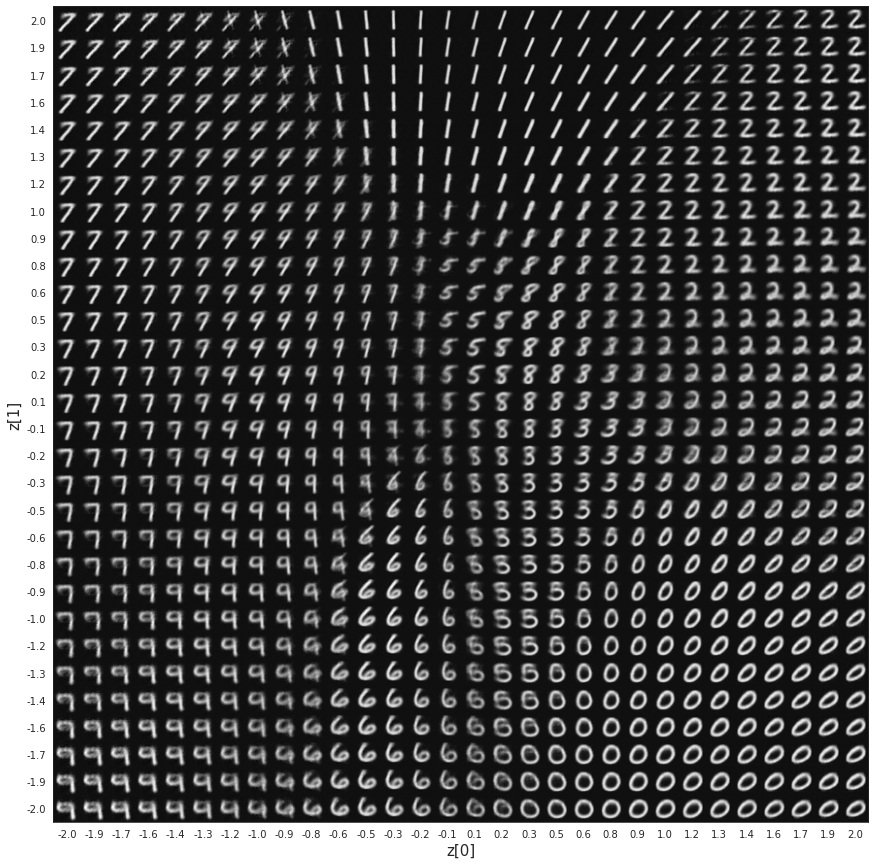

In [9]:
plot_latent(vae.decoder, scale=2.0, num_partition=30)